# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We **TEAM-CW3**, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Climate Change Belief Analysis Challenge

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat or not. This would add to their market research efforts in gauging how their product/service may be received:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of classifying people's belief when is comes to carbon threat by products;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement is given to CW3 by, the senior data scientist (Claudia Wilson), via email reads as follow:

> In this project Explore Data Science Academy's TEAM-CW3 is tasked to solve this challenge by creating an Advanced Classification Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.
 
Additionally we provide these companies with notebook containing explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Sentiment Analysis</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we are importing, and briefly discussing, the libraries that will be used throughout the analysis and modelling. |

---

In [1]:
#NumPy can be used to perform a wide variety of mathematical operations on arrays
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#Modelling Packages

import warnings
warnings.filterwarnings('ignore')

c:\Users\F5470242\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\F5470242\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\F5470242\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
from plotly import graph_objects as go

In [3]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="qyBYUW3bdXWZMKz3qXMeU6Dm4",
    project_name="climate-change-tweet-classification",
    workspace="thulaninyama")

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn, xgboost. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'c:\\Users\\F5470242\\Documents\\CBB6\\Thulani\\Advanced-Regression-Starter-Data-3036 (3)\\Advanced-Regression-Starter-Data' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/thulaninyama/climate-change-tweet-classification/d0c29bec36934280884f25a557c301db



<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we are loading the data from the `df_train` file into a DataFrame. |

---

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/TEAM-CW3/classification-predict-streamlit-data/main/train.csv') # load the train data
df_test = pd.read_csv('https://raw.githubusercontent.com/TEAM-CW3/classification-predict-streamlit-data/main/test_with_no_labels.csv')  # load the test data
df_train_copy = df_train.copy()

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we are performing an in-depth analysis of all the variables in the DataFrame. |

---


In [5]:
# look at data frame columns
df_train_copy.columns = [col.replace(" ","_") for col in df_train_copy.columns]
df_train_copy.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [6]:
# look at data types of columns
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [7]:
df_train_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment,15819.0,0.917504,0.836537,-1.0,1.0,1.0,1.0,2.0
tweetid,15819.0,501719.433656,289045.983132,6.0,253207.5,502291.0,753769.0,999888.0


In [8]:
# look at number of columns and rows
print("Number of columns: ", df_train_copy.shape[1])
print("Number of rows   : ", df_train_copy.shape[0])

Number of columns:  3
Number of rows   :  15819


In [9]:
print('Count columns per data type:')
df_train_copy.dtypes.value_counts()

Count columns per data type:


int64     2
object    1
dtype: int64

In [10]:
# look at the skew of the data
df_train_copy.skew()

sentiment   -0.683959
tweetid     -0.008471
dtype: float64

Text(0, 0.5, 'Density')

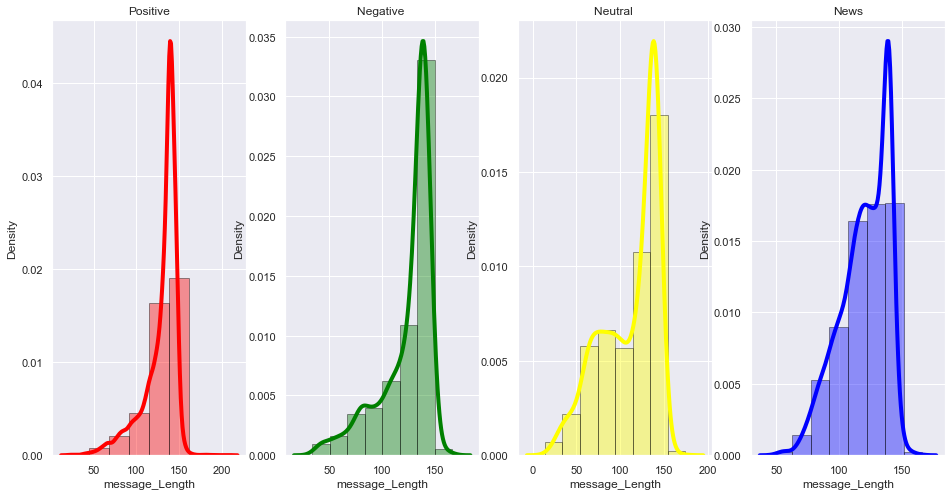

In [11]:
# Distribution plots for the label
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,8))

#For Positive 
sns.distplot(df_train_copy[df_train_copy['sentiment']==1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'red', 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_title('Positive')
ax1.set_xlabel('message_Length')
ax1.set_ylabel('Density')

#For Negative 
sns.distplot(df_train_copy[df_train_copy['sentiment']==-1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'green', 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.set_title('Negative ')
ax2.set_xlabel('message_Length')
ax2.set_ylabel('Density')

#For Neutral 
sns.distplot(df_train_copy[df_train_copy['sentiment']==0]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'yellow',  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.set_title('Neutral ')
ax3.set_xlabel('message_Length')
ax3.set_ylabel('Density')

#For Neews
sns.distplot(df_train_copy[df_train_copy['sentiment']==2]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'blue', 
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.set_title('News')
ax4.set_xlabel('message_Length')
ax4.set_ylabel('Density')

In [12]:
# look at unique values in the columns that have object data type
print('Unique values in \'Sentiment\' column: ' + str(df_train_copy.sentiment.unique()))

Unique values in 'Sentiment' column: [ 1  2  0 -1]


In [13]:
# have a look at feature distributions
print("See distribution of messages per sentiment : ")
count = df_train.groupby("sentiment").count()["message"].reset_index().sort_values(by="message", ascending=False)
count.style.background_gradient(cmap="Reds")

See distribution of messages per sentiment : 


,sentiment,message
2,1,8530
3,2,3640
1,0,2353
0,-1,1296


picture

In [14]:
working_df = df_train.copy()
# Labeling the target
working_df['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in working_df['sentiment']]

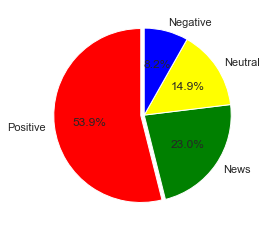

In [15]:
# Observing numerical distribution
values = working_df['sentiment'].value_counts()/working_df.shape[0]
labels = (working_df['sentiment'].value_counts()/working_df.shape[0]).index
colors = ['red', 'green', 'yellow', 'blue']
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0, 0, 0), colors=colors)
plt.show()

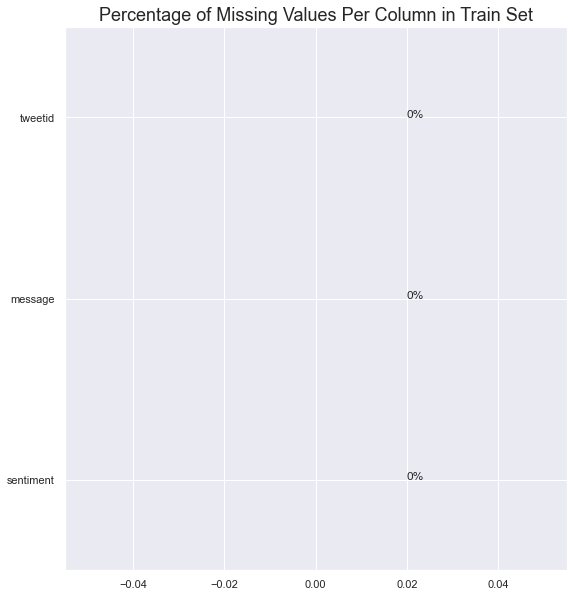

In [16]:
# plot missing values in train set
ax = df_train_copy.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10), color='tab:red')
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':18})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df_train.shape[0])*100, fontdict={'size':18})
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

<a id="four"></a>
## 4. Sentiment Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Sentiment Analysis ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [17]:
# select the columns that are numeric
data = df_train_copy.select_dtypes(float)

In [18]:
data.head(1).T

,0


In [19]:
# look at the average values each variable
df=data.mean().reset_index(name='mean')
df

,index,mean


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we create one or more classification models that are able to accurately classify if people believe in climate change or not. |

---

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic